In [1]:
import model
import numpy as np
import random
from utils import simple_graph
import tank
import truck


import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

In [2]:
# Tanks' information
n = 5 
tank_ids = list(range(1,n+1))
tank_max_loads =  np.array([100., 100., 200., 300., 400.])
tank_current_loads =  np.array([50., 60., 120., 150., 300.])
tank_consumption_rates =  np.array([10.] * n)

n_discrete_load_levels = np.array([5,5,10,10,10])

# Trucks' information
k = 2
truck_ids = list(range(k))
truck_max_loads = np.array([20., 50.])
truck_current_loads = truck_max_loads.copy()
truck_current_positions =  np.array([0] * k)
#truck_fractions_deliverable =  np.array([1.] * k) # we for now we only allow to deliver all the content of the truck
truck_fractions_deliverable =  np.array([ np.array([0.5, 1.]), 
                                          np.array([0.5, 1.])
                                        ]) # we for now we only allow to deliver all the content of the truck
n_discrete_load_levels_trucks = np.array([2,2])

# System's information
def simple_graph(n: int):    
    A = np.zeros((n,n))
    A[0,0:n] = 1
    A = A.astype(int)
    return(A)

graph = simple_graph(n+1)
tanks = [tank.Tank( tank_id, current_load, max_load, consumption_rate, n_lvls) 
         for  tank_id, current_load, max_load, consumption_rate, n_lvls in 
         zip( tank_ids, tank_current_loads, tank_max_loads, tank_consumption_rates, n_discrete_load_levels)]
trucks = [truck.Truck( truck_id, current_load, max_load, current_position, load_fractions_deliverable, n_lvls) 
         for  truck_id, current_load, max_load, current_position, load_fractions_deliverable, n_lvls in 
         zip(truck_ids, truck_current_loads, truck_max_loads, truck_current_positions, 
             truck_fractions_deliverable, n_discrete_load_levels_trucks)]

def simple_weights(n: int, w: float):    
    W = np.full((n,n), np.inf)
    W[0,:] = w
    return(W)
w =  np.array([0, 20., 10., 30., 50.5, 45.])

weights_matrix = simple_weights(n+1, w)




In [3]:
toy_system = model.System(tanks = tanks, trucks = trucks, adjacency_matrix = graph, weights_matrix = weights_matrix)

self.trucks [<truck.Truck object at 0x7f8a642c3cf8>, <truck.Truck object at 0x7f8a642c3d30>]
Final rewards:  -75.0
self.trucks [<truck.Truck object at 0x7f8a642c3cf8>, <truck.Truck object at 0x7f8a642c3d30>]
Final rewards:  -65.0
self.trucks [<truck.Truck object at 0x7f8a642c3cf8>, <truck.Truck object at 0x7f8a642c3d30>]
Final rewards:  -65.0
self.trucks [<truck.Truck object at 0x7f8a642c3cf8>, <truck.Truck object at 0x7f8a642c3d30>]
Final rewards:  -85.0
self.trucks [<truck.Truck object at 0x7f8a642c3cf8>, <truck.Truck object at 0x7f8a642c3d30>]
Final rewards:  -110.5
self.trucks [<truck.Truck object at 0x7f8a642c3cf8>, <truck.Truck object at 0x7f8a642c3d30>]
Final rewards:  -85.0
self.trucks [<truck.Truck object at 0x7f8a642c3cf8>, <truck.Truck object at 0x7f8a642c3d30>]
Final rewards:  -105.5
self.trucks [<truck.Truck object at 0x7f8a642c3cf8>, <truck.Truck object at 0x7f8a642c3d30>]
Final rewards:  -85.5
self.trucks [<truck.Truck object at 0x7f8a642c3cf8>, <truck.Truck object at 0x

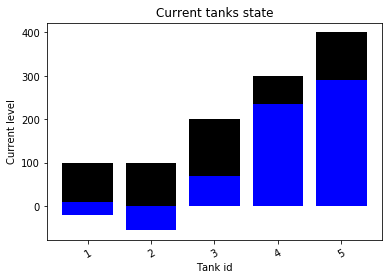

In [4]:
# Simulation
%matplotlib inline

seed = None 

iterations = 50
visualization_steps = []
rewards_list = []

for it in range(iterations):
    rewards = toy_system.random_action(seed);
    rewards_list.append(rewards)
    #print(toy_system.state())
    print("Final rewards: ", rewards);
    toy_system.reset_trucks_positions();
    visualization_steps.append(toy_system.visualize());

In [5]:
visualization_steps[0][2]

[40.0, 50.0, 135.0, 150.0, 290.0]

In [6]:
visualization_steps[0][0]+1

array([1, 2, 3, 4, 5])

In [7]:
visualization_steps;

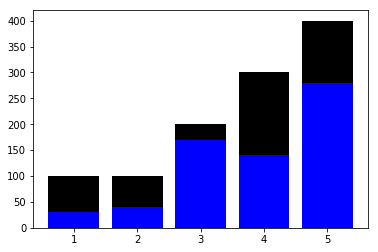

In [8]:
def barlist(n): 
    return visualization_steps[n][2]

fig=plt.figure()

N=iterations #Number of frames
x=visualization_steps[0][0]+1

plt.bar(x,visualization_steps[0][1], color = 'black')
barcollection = plt.bar(x,barlist(0), color = 'blue')

def animate(i):
    y=barlist(i+1)
    for i, b in enumerate(barcollection):
        b.set_height(y[i])

anim=animation.FuncAnimation(fig,animate,repeat=False,blit=False,frames=N-1,
                             interval=100)
HTML(anim.to_html5_video())
#anim.save('mymovie.mp4',writer=animation.FFMpegWriter(fps=10))
#plt.show()

In [9]:
#toy_system.visualize_step(visualization_steps[2]);

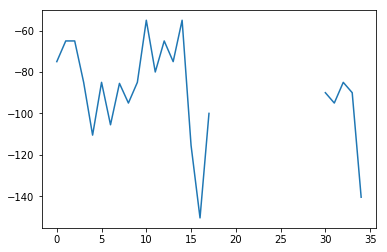

In [10]:
%matplotlib inline
plt.plot(range(iterations),rewards_list)

In [11]:
toy_system.n_states()

3600000

In [12]:
n_s = ((n+1)**k)
a = np.prod(n_discrete_load_levels)
b = np.prod(n_discrete_load_levels_trucks)
n_s = n_s *a *b
n_s

3600000

# Small system to apply Q-learning algorithm


In [13]:
# Tanks' information
n = 5 
tank_ids = list(range(1,n+1))
tank_max_loads =  np.array([100., 100., 200., 300., 400.])
tank_current_loads =  np.array([50., 60., 120., 150., 300.])
tank_consumption_rates =  np.array([10.] * n)

n_discrete_load_levels = np.array([2,2,2,2,2])

# Trucks' information
k = 2
truck_ids = list(range(k))
truck_max_loads = np.array([20., 50.])
truck_current_loads = truck_max_loads.copy()
truck_current_positions =  np.array([0] * k)
#truck_fractions_deliverable =  np.array([1.] * k) # we for now we only allow to deliver all the content of the truck
truck_fractions_deliverable =  np.array([ np.array([0.5, 1.]), 
                                          np.array([0.5, 1.])
                                        ]) # we for now we only allow to deliver all the content of the truck
n_discrete_load_levels_trucks = np.array([2,2])

# System's information
def simple_graph(n: int):    
    A = np.zeros((n,n))
    A[0,0:n] = 1
    A = A.astype(int)
    return(A)

graph = simple_graph(n+1)
tanks = [tank.Tank( tank_id, current_load, max_load, consumption_rate, n_lvls) 
         for  tank_id, current_load, max_load, consumption_rate, n_lvls in 
         zip( tank_ids, tank_current_loads, tank_max_loads, tank_consumption_rates, n_discrete_load_levels)]
trucks = [truck.Truck( truck_id, current_load, max_load, current_position, load_fractions_deliverable, n_lvls) 
         for  truck_id, current_load, max_load, current_position, load_fractions_deliverable, n_lvls in 
         zip(truck_ids, truck_current_loads, truck_max_loads, truck_current_positions, 
             truck_fractions_deliverable, n_discrete_load_levels_trucks)]

def simple_weights(n: int, w: float):    
    W = np.full((n,n), np.inf)
    W[0,:] = w
    return(W)
w =  np.array([0, 20., 10., 30., 50.5, 45.])

weights_matrix = simple_weights(n+1, w)

toy_system = model.System(tanks = tanks, trucks = trucks, adjacency_matrix = graph, weights_matrix = weights_matrix)

a_s_dim = toy_system.states_dim * toy_system.actions_dim
a_s_dim

46080

In [14]:
toy_system.discrete_state()



rewards = toy_system.random_action(seed);
rewards_list.append(rewards)
#prnt(toy_system.state())
print("Final rewards: ", rewards);
toy_system.reset_trucks_positions();

toy_system.da

self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
Final rewards:  -55.0


[[2, 2], [0, 0]]

In [15]:
toy_system.ds

[[2, 2], [1, 1], [0, 0, 1, 0, 1]]

In [16]:
a = [[3, 4], [1, 1], [0, 0, 1, 0, 1]]
aa= ''.join(str(''.join(str(y) for y in x)) for x in a)

In [17]:
print(toy_system.ds)
print(toy_system.da)

[[2, 2], [1, 1], [0, 0, 1, 0, 1]]
[[2, 2], [0, 0]]


In [18]:
sa_new = toy_system.state_action_to_string()
sa_new

'2211001012200'

In [19]:
new_dict = {}
new_dict[sa_new] = {"qval": 1}

In [20]:
new_dict[sa_new]['qval']

1

## Off-policy algorithm

In [37]:
learning_rate0 = 0.05
learning_rate_decay = 0.1
n_iterations = 20000
discount_rate = 0.95

toy_system = model.System(tanks = tanks, trucks = trucks, adjacency_matrix = graph, weights_matrix = weights_matrix)

Q = {}

def is_key(dic, key):
    if key in dic:
        return(True)
    else: return(False)

is_key(new_dict, sa_new)

state_length = 2*k + n

In [38]:
for iteration in range(n_iterations):
    reward = toy_system.random_action()
    sa_current = toy_system.state_action_to_string()
    
    if is_key(Q, sa_current) == False:
        Q[sa_current] = 0
        
    learning_rate = learning_rate0 / (1+iteration*learning_rate_decay)
    
    Q_max = max([Q[key] for key in Q.keys() if key.startswith(sa_current[0:state_length])])
    
    Q[sa_current] = ( (1-learning_rate) * Q[sa_current] 
                     + learning_rate* (reward + discount_rate * Q_max)
                    )
    
    toy_system.reset_trucks_positions();



self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck obje

self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck obje

self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck obje

self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck obje

self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck obje

self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck obje

self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck obje

self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck obje

self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck obje

self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck obje

self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck obje

self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck obje

self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck obje

self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck obje

self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck obje

self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck obje

self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck obje

self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck obje

self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck obje

self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck obje

self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck obje

self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck obje

self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck obje

self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck obje

self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck obje

self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck obje

self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck obje

self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck obje

self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck obje

self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck obje

self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck obje

self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck obje

self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck obje

self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck obje

self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck obje

self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck obje

self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck obje

self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck obje

self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck obje

self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck obje

self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck obje

self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck obje

self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck obje

self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck obje

self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck obje

self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck obje

self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck obje

self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck obje

self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck obje

self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck obje

self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck obje

self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck obje

self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck obje

self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck obje

self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck obje

self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck obje

self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck obje

self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck obje

self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck obje

self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck obje

self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck obje

self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck obje

self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck obje

self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck obje

self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck obje

self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck obje

self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck obje

self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck obje

self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck obje

self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck obje

self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck obje

self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck obje

self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck obje

self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck obje

self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck obje

self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck obje

self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck obje

self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck obje

self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck obje

self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck obje

self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck obje

self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck obje

self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck obje

self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck obje

self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck obje

self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck obje

self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck obje

self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck obje

self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck obje

self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck obje

self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck obje

self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck obje

self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck obje

self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck obje

self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck obje

self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck obje

self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck obje

self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck obje

self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck object at 0x7f8a5be1c6a0>]
self.trucks [<truck.Truck object at 0x7f8a5be1c668>, <truck.Truck obje

In [ ]:


new_keys = new_dict.keys()

In [ ]:
[Q[key] for key in new_keys if key.startswith(sa_new[0:2])]

In [ ]:
toy_system.ds

In [ ]:
toy_system.da

In [ ]:
max([1,2,3])

In [ ]:
[1,2,3][0:3]